In [1]:
# The basic libraries
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pydotplus
import seaborn as sns # for visualization
import statsmodels.api as sm
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

from sklearn import tree
from sklearn import neighbors, datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from statsmodels.formula.api import ols

# Error Handling
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# Neural Networks
import tensorflow as tf # This tells Colab that we are using TensorFlow
from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense
print("Current TensorFlow version is", tf.__version__)

#Clustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
plt.style.use('ggplot')

# EDA
#!pip install -U ydata-profiling[notebook,unicode]
#from ydata_profiling import ProfileReport # Now we load the package

Current TensorFlow version is 2.12.0


In [15]:
phone = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/mobile_phone.csv")
phone.head()

,battery_power_mAh,clock_speed,dual_sim,front_cam_mp,5G,int_memory_gb,thickness_cm,weight_grams,n_cores,back_cam_mp,ram_mb,screen_height_cm,screen_width_cm,talk_time_hrs,condition,price
0,1650,2.3,no,0,1,38,0.7,89,1,1,324,14,10,2,fair,92
1,1093,1.1,yes,0,0,42,0.4,114,1,4,2856,12,3,2,good,263
2,1934,2.6,yes,0,1,46,0.1,103,1,17,2940,13,9,2,like_new,498
3,825,0.5,yes,0,1,23,0.1,86,2,0,3278,8,6,2,excellent,309
4,1156,2.3,yes,0,1,3,1.0,95,2,0,3786,11,1,2,like_new,453


In [3]:
phone.groupby(['dual_sim']).median()

,battery_power_mAh,clock_speed,front_cam_mp,5G,int_memory_gb,thickness_cm,weight_grams,n_cores,back_cam_mp,ram_mb,screen_height_cm,screen_width_cm,talk_time_hrs,price
dual_sim,,,,,,,,,,,,,,
no,1263.0,1.5,3.0,1.0,33.0,0.5,141.0,4.0,10.0,2081.0,12.0,5.0,11.0,179.0
yes,1197.5,1.5,3.0,1.0,33.0,0.5,139.5,4.0,10.0,2215.0,12.0,5.0,11.0,223.0


In [4]:
phone.groupby(['dual_sim','condition']).median()

battery_power_mAh  clock_speed  front_cam_mp   5G  \
dual_sim condition                                                       
no       excellent              1315.0          1.5           3.0  1.0   
         fair                   1162.0          1.5           3.0  0.0   
         good                   1232.0          1.2           3.0  1.0   
         like_new               1408.0          2.0           4.0  1.0   
         parts_only             1179.0          0.9           4.0  0.0   
         sw_errors              1225.0          2.0           5.0  0.0   
yes      excellent              1261.0          1.5           3.0  0.0   
         fair                   1090.0          1.5           3.0  1.0   
         good                   1220.0          1.3           3.0  1.0   
         like_new               1310.0          1.8           3.0  1.0   
         parts_only             1153.5          0.8           3.0  0.0   
         sw_errors              1195.0          1.9           6.0  0.0   

                     int_memory_gb  thickness_cm  weight_grams  n_cores  \
dual_sim condition                                                        
no       excellent            32.0           0.5         142.0      5.0   
         fair                 33.0           0.5         140.5      4.0   
         good                 33.0           0.5         135.0      4.0   
         like_new             34.0           0.5         139.0      4.0   
         parts_only           32.0           0.5         146.0      4.0   
         sw_errors            28.0           0.5         168.0      4.0   
yes      excellent            31.0           0.5         138.5      4.0   
         fair                 32.0           0.5         139.0      5.0   
         good                 32.0           0.5         146.0      4.0   
         like_new             35.0           0.5         136.0      4.0   
         parts_only           33.5           0.5         126.5      5.0   
         sw_errors            17.0           0.5         159.0      3.0   

                     back_cam_mp  ram_mb  screen_height_cm  screen_width_cm  \
dual_sim condition                                                            
no       excellent          10.0  2755.5              12.0              5.0   
         fair               10.0   955.0              12.0              5.0   
         good                9.0  1866.0              13.0              5.0   
         like_new           10.0  3449.0              14.0              5.0   
         parts_only         11.0   624.0              13.0              5.0   
         sw_errors          11.0   768.0              11.0              4.0   
yes      excellent          10.0  2837.5              12.0              5.0   
         fair               10.0   991.0              12.0              4.0   
         good               10.0  1933.0              12.0              4.0   
         like_new           10.0  3488.0              13.0              5.0   
         parts_only         10.0   714.5              13.5              5.0   
         sw_errors          12.0   841.0              12.0              3.0   

                     talk_time_hrs  price  
dual_sim condition                         
no       excellent            11.0  289.0  
         fair                 11.0   85.0  
         good                 11.0  149.0  
         like_new             11.0  409.0  
         parts_only           11.0   35.0  
         sw_errors            17.0   49.0  
yes      excellent            11.0  289.0  
         fair                 10.0   85.0  
         good                 11.0  162.0  
         like_new             10.0  409.0  
         parts_only           11.0   35.0  
         sw_errors            16.0   49.0

<Axes: title={'center': 'n_cores'}, xlabel='dual_sim'>

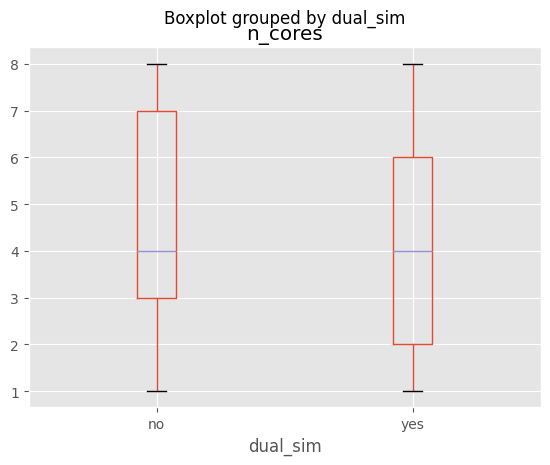

In [5]:
phone.boxplot(column='n_cores', by='dual_sim')

In [6]:
phone[phone['condition'] == 'parts_only']

,battery_power_mAh,clock_speed,dual_sim,front_cam_mp,5G,int_memory_gb,thickness_cm,weight_grams,n_cores,back_cam_mp,ram_mb,screen_height_cm,screen_width_cm,talk_time_hrs,condition,price
6,954,0.5,no,0,0,50,0.3,134,2,11,438,17,0,2,parts_only,32
86,868,0.9,no,5,0,5,0.4,137,4,7,1519,13,0,2,parts_only,35
101,926,0.8,no,6,1,59,0.8,161,7,14,256,18,7,2,parts_only,35
105,719,2.9,no,7,0,6,0.7,102,6,8,841,9,1,2,parts_only,57
128,1111,1.4,yes,10,0,15,0.5,198,7,14,1630,13,5,2,parts_only,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,1915,0.5,no,4,0,24,0.2,106,4,17,345,18,10,20,parts_only,32
2949,1170,0.9,no,6,1,14,0.4,199,2,13,715,18,5,20,parts_only,35
2973,1693,1.4,no,9,0,41,0.1,139,2,17,575,16,5,20,parts_only,35
2986,769,0.5,yes,12,1,54,0.2,112,4,19,941,15,8,20,parts_only,35


In [7]:
phone.shape

(3000, 16)

In [16]:
phone1 = phone[['n_cores', 'ram_mb','price']]
train,test = train_test_split(phone1,test_size=0.2)
print('Number of rows in train is - {0}'.format(train.shape[0]))
print('Number of rows in test is - {0} '.format(test.shape[0]))

Number of rows in train is - 2400
Number of rows in test is - 600 


                   battery_power_mAh    ram_mb     price
battery_power_mAh           1.000000 -0.011059  0.119262
ram_mb                     -0.011059  1.000000  0.850401
price                       0.119262  0.850401  1.000000


<Axes: >

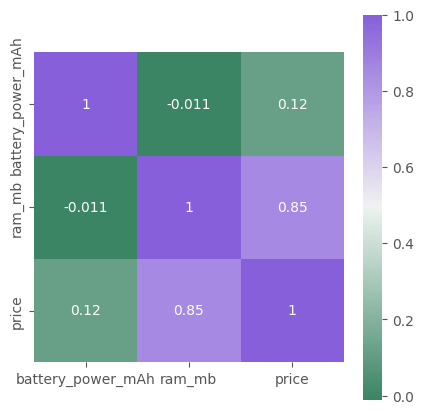

In [17]:
corr = phone[['battery_power_mAh','ram_mb','price']].corr()
print(corr)

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = bool), annot=True,
            cmap = sns.diverging_palette(150, 275, as_cmap = True), square = True, ax = ax)


In [19]:
phone['condition'].nunique()

6

In [24]:
X = phone[['n_cores','ram_mb','price']]
y = phone['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

means = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - means)/std
X_test = (X_test - means)/std


X_train shape: (2400, 3)
y_train shape: (2400,)


In [25]:
rf = RandomForestClassifier(n_estimators=10,verbose=1, criterion='entropy')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8416666666666667

In [26]:
rf100 = RandomForestClassifier(n_estimators=100,verbose=1, criterion='entropy')
rf100.fit(X_train,y_train)
y_pred100 = rf100.predict(X_test)
accuracy_score(y_test, y_pred100)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


0.85

In [28]:
rf1000 = RandomForestClassifier(n_estimators=1000,verbose=1, criterion='entropy')
rf1000.fit(X_train,y_train)
y_pred1000 = rf1000.predict(X_test)
accuracy_score(y_test, y_pred1000)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s


0.845

In [37]:
bins3 = np.linspace(phone.price.min(),phone.price.max(),4)
print(bins3)
labels = ['low', 'medium', 'high']
phone['bins'] = pd.cut(phone['price'], bins=bins3, labels=labels, include_lowest=True)
phone.head()

[ 29.         185.33333333 341.66666667 498.        ]


,battery_power_mAh,clock_speed,dual_sim,front_cam_mp,5G,int_memory_gb,thickness_cm,weight_grams,n_cores,back_cam_mp,ram_mb,screen_height_cm,screen_width_cm,talk_time_hrs,condition,price,bins
0,1650,2.3,no,0,1,38,0.7,89,1,1,324,14,10,2,fair,92,low
1,1093,1.1,yes,0,0,42,0.4,114,1,4,2856,12,3,2,good,263,medium
2,1934,2.6,yes,0,1,46,0.1,103,1,17,2940,13,9,2,like_new,498,high
3,825,0.5,yes,0,1,23,0.1,86,2,0,3278,8,6,2,excellent,309,medium
4,1156,2.3,yes,0,1,3,1.0,95,2,0,3786,11,1,2,like_new,453,high


In [30]:
X = phone[['n_cores','ram_mb','price']]
y = phone['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))


X_train shape: (2400, 3)
y_train shape: (2400,)


In [31]:
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print("Test set score: {:.4f}".format(model1.score(X_test, y_test)))
accuracy_score(y_test,y_pred)

Test set score: 0.8350


0.835

In [32]:
# Model with k=25

model25 = KNeighborsClassifier(n_neighbors = 25)
model25.fit(X_train, y_train)
y_pred25 = model25.predict(X_test)
print("Test set score: {:.4f}".format(model25.score(X_test, y_test)))
accuracy_score(y_test,y_pred25)

Test set score: 0.7800


0.78

In [33]:
# Model with k=200

model200 = KNeighborsClassifier(n_neighbors = 200)
model200.fit(X_train, y_train)
y_pred200 = model200.predict(X_test)
print("Test set score: {:.4f}".format(model200.score(X_test, y_test)))
accuracy_score(y_test,y_pred200)

Test set score: 0.5983


0.5983333333333334

In [34]:
ins_naivebayes = GaussianNB()
ins_naivebayes.fit(X_train, y_train)
ins_predictions = ins_naivebayes.predict(X_test)
print("Test set score: {:.4f}".format(accuracy_score(y_test, ins_predictions)))
ins_naivebayes.score(X_test,y_test)

Test set score: 0.8283


0.8283333333333334

In [36]:
X = phone[['n_cores','ram_mb']]
y = phone['price']

lm = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

# means = np.mean(X_train, axis=0)
# std = np.std(X_train, axis=0)

# X_train = (X_train - means)/std
# X_test = (X_test - means)/std

lm.fit(X_train,y_train)
pred_lm = lm.predict(X_train)
print(lm.score(X_test, y_test))

X_train shape: (2400, 2)
X_test shape: (600, 2)
0.7395037676480791


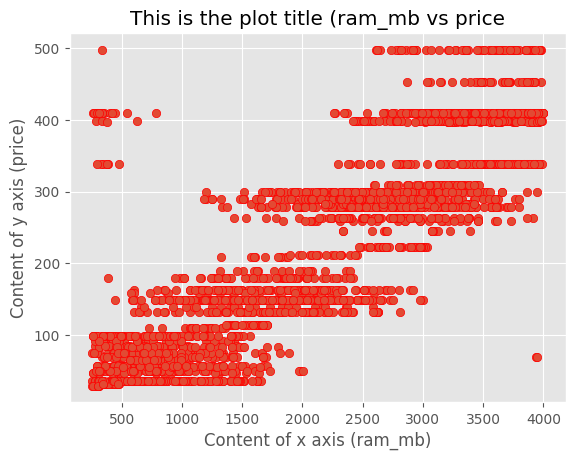

In [38]:
# Setting up the x and y axes of the plot
x = phone[('ram_mb')]
y = phone[('price')]

# Building the plot with red outlines for better visibility
plt.scatter(x, y, edgecolors='r')

# NO PLOT WITHOUT LABELS AND TITLE--EVER!!!!!!!
plt.xlabel('Content of x axis (ram_mb)')
plt.ylabel('Content of y axis (price)')
plt.title('This is the plot title (ram_mb vs price')
plt.show()